# 3. 로지스틱 회귀

## 로지스틱 회귀 예제

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(["seaborn-whitegrid"])

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import make_classification

/var/folders/79/v97_0rqs3p34z9xx6y57xks80000gn/T/ipykernel_4274/902776506.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(["seaborn-whitegrid"])


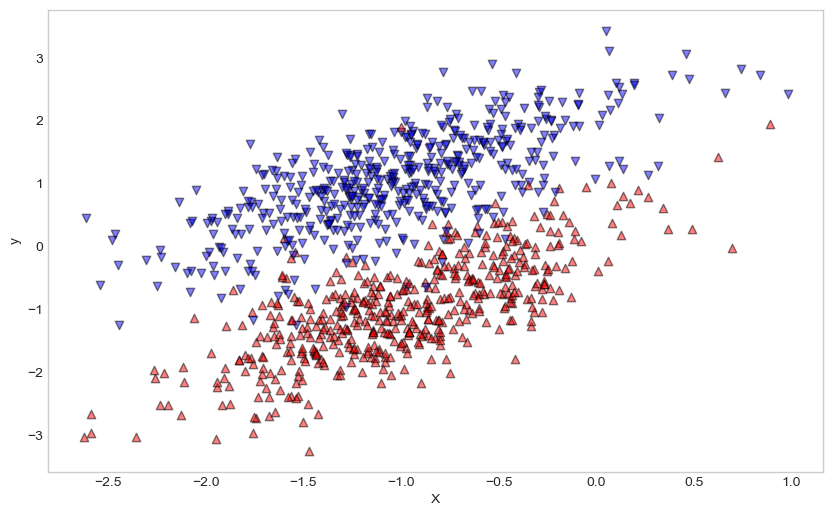

In [25]:
# 피처 데이터 및 타겟 데이터 만들기
samples = 1000
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=12)

# 분류 시각화
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.grid()
ax.set_xlabel("X")
ax.set_ylabel("y")

for idx, cl in enumerate(y):
    if y[cl] == 0:
        plt.scatter(X[idx, 0], X[idx, 1], color="b", marker="v", alpha=0.5, edgecolors="k")
    else:
        plt.scatter(X[idx, 0], X[idx, 1], color="r", marker="^", alpha=0.5, edgecolors="k")

plt.show()

In [26]:
# 분류 데이터 로지스틱 회귀하기 위해 학습/테스트 데이터 셋으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# LogisticRegression 모델 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 모델 평가
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

# 교차 검증
scores = cross_val_score(model, X, y, scoring="accuracy", cv=10)
print("cv 평균 점수: {}".format(np.mean(scores)))

학습 데이터 점수: 0.96125
평가 데이터 점수: 0.965
cv 평균 점수: 0.96


## 로지스틱 회귀 분류에 대한 분포 시각화

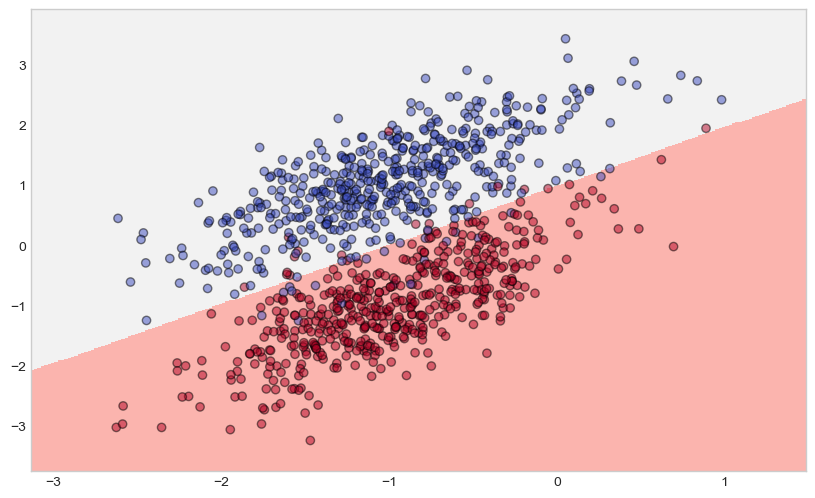

In [27]:
# 각 클래스의 영역을 구분할 데이터들을 만들 기준값들을 생성
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

# 각 클래스의 영역을 구분할 데이터들을 생성
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02)) # 주어진 범위들로 직사각형 그리드(격자 그리드)의 좌표들을 생성

# 영역을 구분할 데이터들을 분류
df = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])
Z = model.predict(df)
Z = Z.reshape(xx.shape)

# 분류된 데이터들로 영역을 구분
plt.figure(figsize=(10, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)

# 분류된 데이터들을 산점도로 시각화
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, edgecolors="k", cmap=plt.cm.coolwarm, c=np.abs(y - 1)) # np.abs(x) => x를 절대값으로 만들어줌
plt.show()

# 붓꽃 데이터

In [28]:
from sklearn.datasets import load_iris

# 붓꽃 데이터 불러오기
iris = load_iris()
print(iris.keys)
print(iris.DESCR)

<built-in method keys of Bunch object at 0x7f7f73077e00>
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high

In [29]:
# 데이터 프레임으로 만들기
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
species = pd.Series(iris.target, dtype="category")
species = species.cat.rename_categories(iris.target_names)
iris_df["species"] = species
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


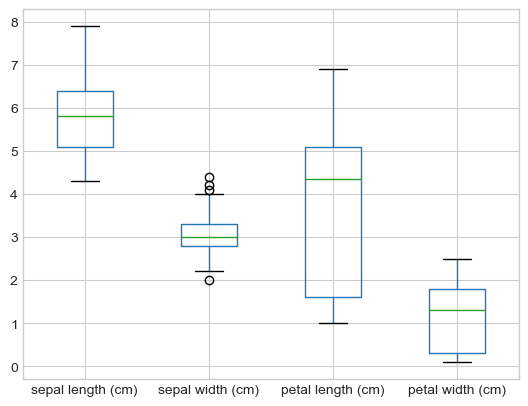

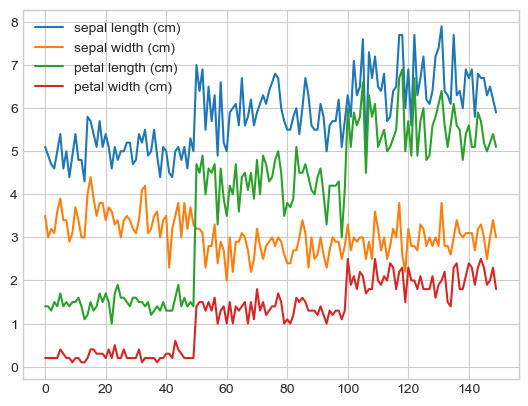

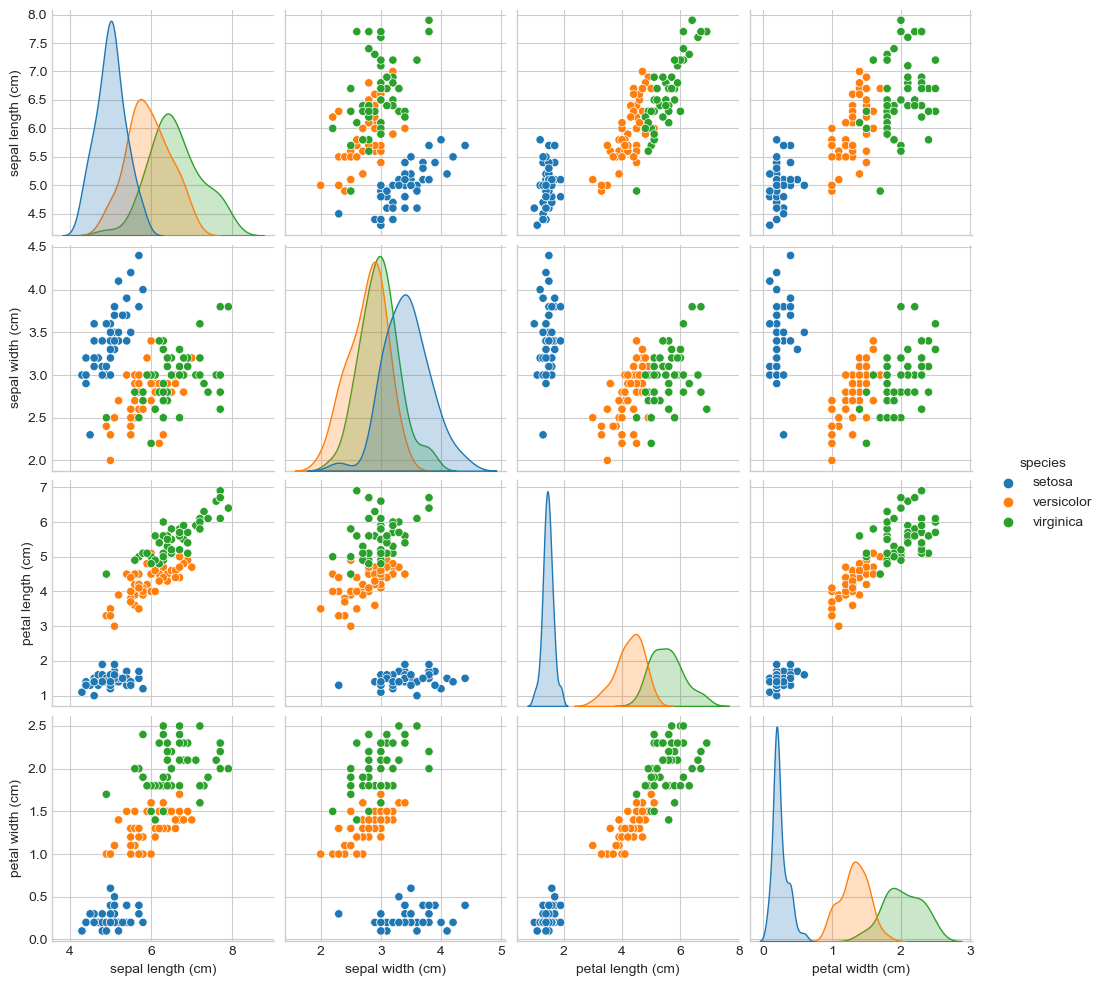

In [30]:
# 상자 수염 그래프
iris_df.boxplot();

# plot
iris_df.plot();

# 종별로 꽃잎, 꽃받침 정보 시각화
sns.pairplot(iris_df, hue="species");

## 붓꽃 데이터에 대한 로지스틱 회귀

In [31]:
# 학습/테스트 데이터 셋 분리
X_train, X_test, y_train, y_test = train_test_split(iris.data[:, [2, 3]], iris.target, test_size=0.2, random_state=1, stratify=iris.target)

# LogisticRegression 모델 학습
model = LogisticRegression(solver="lbfgs", C=100.0, multi_class="auto", random_state=1)
model.fit(X_train, y_train)

# 모델 평가
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9666666666666667
평가 데이터 점수: 0.9666666666666667


### 분류에 대한 분포 시각화

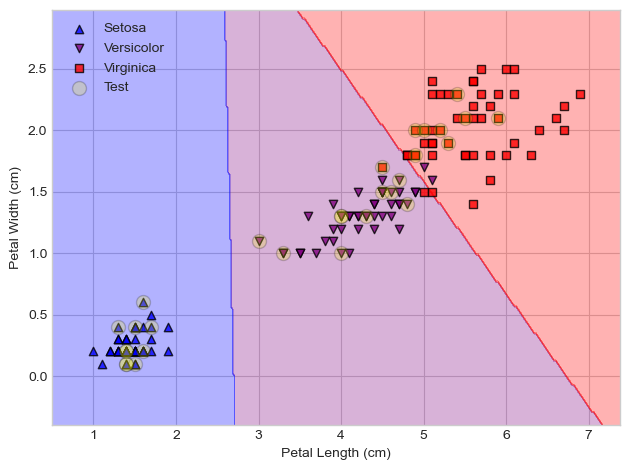

In [32]:
from matplotlib.colors import ListedColormap

# 전체 X, y 데이터를 만듦
X = np.vstack((X_train, X_test))
y = np.hstack((y_train, y_test))

# 각 클래스의 영역을 구분할 데이터들을 만들 기준값들을 생성
x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y1_min, y1_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

# 각 클래스의 영역을 구분할 데이터들을 생성
xx1, yy1 = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(y1_min, y1_max, 0.02))

# 영역을 구분할 데이터들을 분류(붓꽃 종별로)
df = pd.DataFrame(np.c_[xx1.ravel(), yy1.ravel()])
Z = model.predict(df)
Z = Z.reshape(xx1.shape)

# colors, cmap, markers, species
species = ["Setosa", "Versicolor", "Virginica"]
markers = ["^", "v", "s"]
colors = ["blue", "purple", "red"]
cmap = ListedColormap(colors[:len(np.unique(y))])

# 분류된 데이터들로 영역을 구분
plt.contourf(xx1, yy1, Z, cmap=cmap, alpha=0.3)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(yy1.min(), yy1.max())

# 분류된 데이터들을 산점도로 시각화
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(X[y == cl, 0], X[y == cl, 1], alpha=0.8, color=colors[idx], marker=markers[idx], label=species[idx], edgecolors="k")

# 테스트 데이터들을 분리
X_comb_test, y_comb_test = X[121:, :], y[121:]

# 테스트 데이터들을 산점도로 시각화
plt.scatter(X_comb_test[:, 0], X_comb_test[:, 1], color="yellow", alpha=0.2, edgecolors="k", marker="o", s=100, label="Test", linewidths=1.0)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(loc="upper left")
plt.tight_layout()

## 붓꽃 데이터 분류하기 위한 최적의 파라미터

In [33]:
import multiprocessing
from sklearn.model_selection import GridSearchCV

# 붓꽃 데이터 불러오기
iris = load_iris()

# 로지스틱 회귀 파라미터 후보군
penalty = ["l1", "l2", None]
C = [2.0, 2.2, 2.4, 2.6, 2.8]
param_grid = {"penalty": penalty,
              "C": C}

# GridSearchCV 수행
gs = GridSearchCV(estimator=LogisticRegression(),
                  param_grid=param_grid,
                  cv=10,
                  n_jobs=multiprocessing.cpu_count(),
                  scoring="accuracy")

# GridSearchCV 학습
result = gs.fit(iris.data, iris.target)

# 모델 평가
print("최적 점수: {}".format(result.best_score_))
print("최적 파라미터: {}".format(result.best_params_))
pd.DataFrame(result.cv_results_)

최적 점수: 0.9800000000000001
최적 파라미터: {'C': 2.0, 'penalty': None}


/Users/yanghaejun/opt/anaconda3/envs/yang_conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yanghaejun/opt/anaconda3/envs/yang_conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000222,0.000036,0.000000,0.000000,2.0,l1,"{'C': 2.0, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
1,0.012764,0.006649,0.000381,0.000065,2.0,l2,"{'C': 2.0, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,9
2,0.005522,0.001876,0.000347,0.000032,2.0,None,"{'C': 2.0, 'penalty': None}",1.0,1.000000,1.0,1.0,0.933333,1.000000,0.866667,1.0,1.0,1.0,0.980000,0.042687,1
3,0.000164,0.000026,0.000000,0.000000,2.2,l1,"{'C': 2.2, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
4,0.010973,0.002638,0.000782,0.001427,2.2,l2,"{'C': 2.2, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,9
5,0.006754,0.004561,0.000317,0.000040,2.2,None,"{'C': 2.2, 'penalty': None}",1.0,1.000000,1.0,1.0,0.933333,1.000000,0.866667,1.0,1.0,1.0,0.980000,0.042687,1
6,0.000121,0.000007,0.000000,0.000000,2.4,l1,"{'C': 2.4, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
7,0.011023,0.003617,0.000363,0.000237,2.4,l2,"{'C': 2.4, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
8,0.005307,0.001235,0.000294,0.000040,2.4,None,"{'C': 2.4, 'penalty': None}",1.0,1.000000,1.0,1.0,0.933333,1.000000,0.866667,1.0,1.0,1.0,0.980000,0.042687,1
9,0.000208,0.000207,0.000000,0.000000,2.6,l1,"{'C': 2.6, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11


# 유방암 데이터

In [34]:
from sklearn.datasets import load_breast_cancer

# 유방암 데이터 불러오기
cancer = load_breast_cancer()
print(cancer.keys())
print(cancer.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these 

In [35]:
# 데이터 프레임으로 만들기
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancers = pd.Series(cancer.target, dtype="category")
cancers = cancers.cat.rename_categories(cancer.target_names)
cancer_df["Target"] = cancers
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## 유방암 데이터 시각화

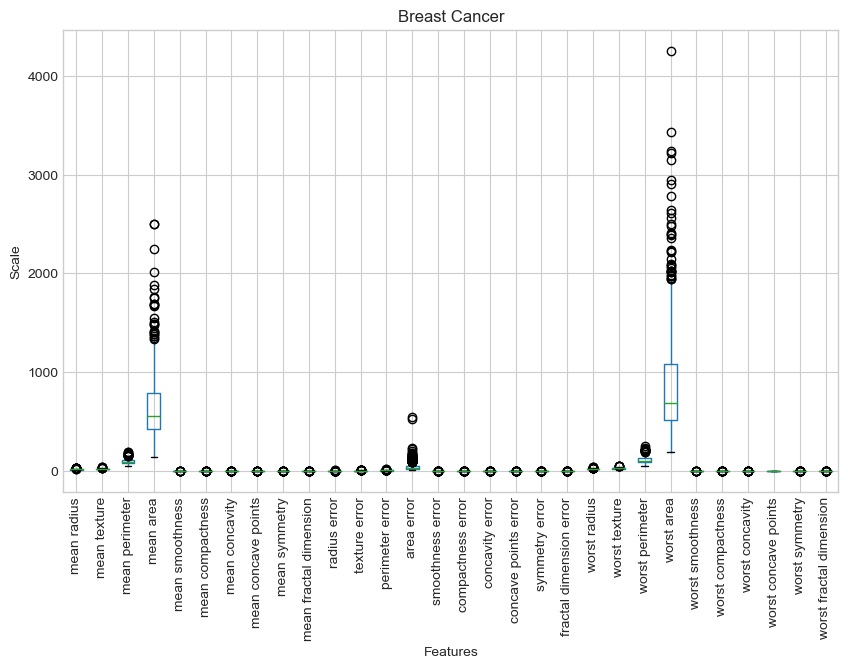

In [36]:
# 상자 수염 그림 시각화
cancer_df.boxplot(figsize=(10, 6))
plt.xticks(rotation=90)
plt.title("Breast Cancer")
plt.xlabel("Features")
plt.ylabel("Scale")
plt.show()


## 유방암 데이터에 대한 로지스틱 회귀

In [37]:
# 유방암 데이터 불러오기
X, y = load_breast_cancer(return_X_y=True)

# 학습/테스트 데이터 셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# LogisticRegression 학습
model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)

# 모델 평가
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9671361502347418
평가 데이터 점수: 0.9440559440559441


### 분류에 대한 분포 시각화

In [38]:
# 유방암 데이터 불러오기(특정 피처 2개 선정)
X, y = load_breast_cancer(return_X_y=True)
X = X[:, [3, 23]]

# 학습/테스트 데이터 셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

# LogisticRegression 학습
model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)

# 모델 평가
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9225352112676056
평가 데이터 점수: 0.9440559440559441


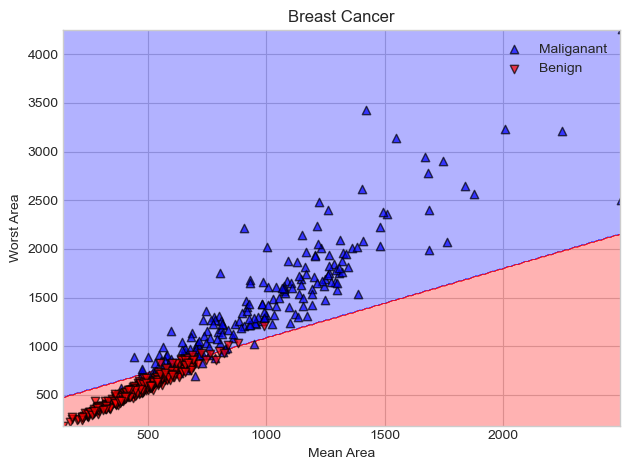

In [39]:
# 클래스의 영역 구분을 위한 기준값 생성
x2_min, x2_max = X[:, 0].min(), X[:, 0].max()
y2_min, y2_max = X[:, 1].min(), X[:, 1].max()

# 각 클래스의 영역을 구분할 데이터들을 생성
xx2, yy2 = np.meshgrid(np.arange(x2_min, x2_max, 10.0), np.arange(y2_min, y2_max, 10.0))

# 영역을 구분할 데이터들을 분류
df = pd.DataFrame(np.c_[xx2.ravel(), yy2.ravel()])
Z = model.predict(df)
Z = Z.reshape(xx2.shape)

# colors, cmap, markers, types
colors = ["blue", "red"]
markers = ["^", "v"]
types = ["Maliganant", "Benign"]
cmap = ListedColormap(colors[:len(np.unique(y))])

# 분류된 데이터들로 영역을 구분
plt.contourf(xx2, yy2, Z, cmap=cmap, alpha=0.3)
plt.xlim(xx2.min(), xx2.max())
plt.ylim(yy2.min(), yy2.max())

# 분류된 데이터들을 산점도로 시각화
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(X[y == cl, 0], X[y == cl, 1], marker=markers[idx], label=types[idx], edgecolors="k", color=colors[idx], alpha=0.7)
plt.title("Breast Cancer")
plt.xlabel("Mean Area")
plt.ylabel("Worst Area")
plt.legend()
plt.tight_layout()

# 확률적 경사 하강법
- 모델을 학습시키기 위한 간단한 방법
- 학습 파라미터에 대한 손실 함수의 기울기를 구해 기울기가 최소화 되는 방향으로 학습
    - ![](images/2023-04-08-19-48-53.png)
- scikit-learn에서는 선형 SGD 회귀와 SGD 분류를 지원

## SGD를 사용한 선형 회귀 분석

In [40]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor, SGDClassifier
from sklearn.pipeline import make_pipeline

# 캘리포니아 주택 가격 데이터 불러오기
california = fetch_california_housing()

# 학습/테스트 데이터 셋 분리
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2, random_state=12)

# pipline을 이용해서 표준화 후 SGDRegressor 학습
model = make_pipeline(StandardScaler(), SGDRegressor(loss="squared_error"))
model.fit(X_train, y_train)

# 모델 평가
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.5889980237606349
평가 데이터 점수: 0.6195266470264074


## 붓꽃 데이터에 대한 SGD 분류

In [41]:
# 붓꽃 데이터 불러오기
iris = load_iris()

# 학습/테스트 데이터 셋 분리
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=1)

# pipline을 이용해서 표준화 후 SGDClassifier 학습
model = make_pipeline(StandardScaler(), SGDClassifier(loss="log"))
model.fit(X_train, y_train)

# 모델 평가
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.925
평가 데이터 점수: 1.0


/Users/yanghaejun/opt/anaconda3/envs/yang_conda/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


## 유방암 데이터에 대한 SGD 분류

In [42]:
# 유방암 데이터 불러오기
cancer = load_breast_cancer()

# 학습/테스트 데이터 셋 분리
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=1)

# pipline을 이용해서 표준화 후 SGDClassifier 학습
model = make_pipeline(StandardScaler(), SGDClassifier(loss="log"))
model.fit(X_train, y_train)

# 모델 평가
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9912087912087912
평가 데이터 점수: 0.9649122807017544


/Users/yanghaejun/opt/anaconda3/envs/yang_conda/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [ ]:
# 유방암 데이터 불러오기
cancer = load_breast_cancer()

# 학습/테스트 데이터 셋 분리
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=1)

# pipline을 이용해서 표준화 후 SGDClassifier 학습
model = make_pipeline(StandardScaler(), SGDClassifier(loss="log"))
model.fit(X_train, y_train)

# 모델 평가
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9912087912087912
평가 데이터 점수: 0.9649122807017544


/Users/yanghaejun/opt/anaconda3/envs/yang_conda/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
